Training MSE: 1.9829102910393452
Testing MSE: 0.18885287551538119
R^2 Score (Testing): 0.99999980364747
Feature Importance:
 dayofyear             0.006725
dayofweek            -0.007843
weekofyear            0.002081
hour                  0.001493
month                 0.014353
energyUnits_lag_1     1.002613
energyUnits_lag_2    -0.000409
energyUnits_lag_3    -0.000174
energyUnits_lag_4    -0.000002
energyUnits_lag_5     0.000739
energyUnits_lag_6    -0.000134
energyUnits_lag_7    -0.001104
energyUnits_lag_8     0.000964
energyUnits_lag_9    -0.000013
energyUnits_lag_10   -0.002507
dtype: float64


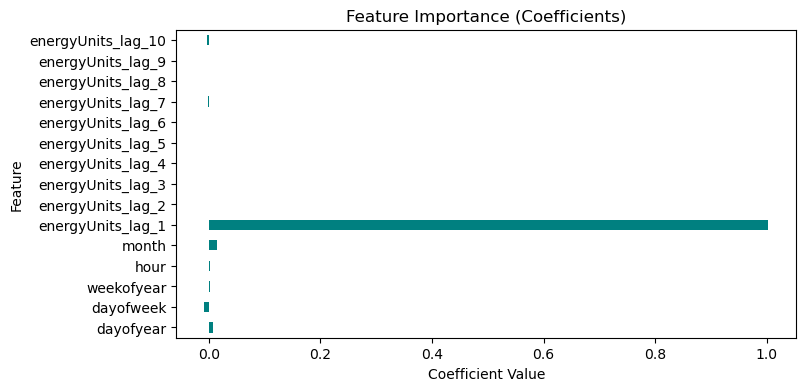

E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  w

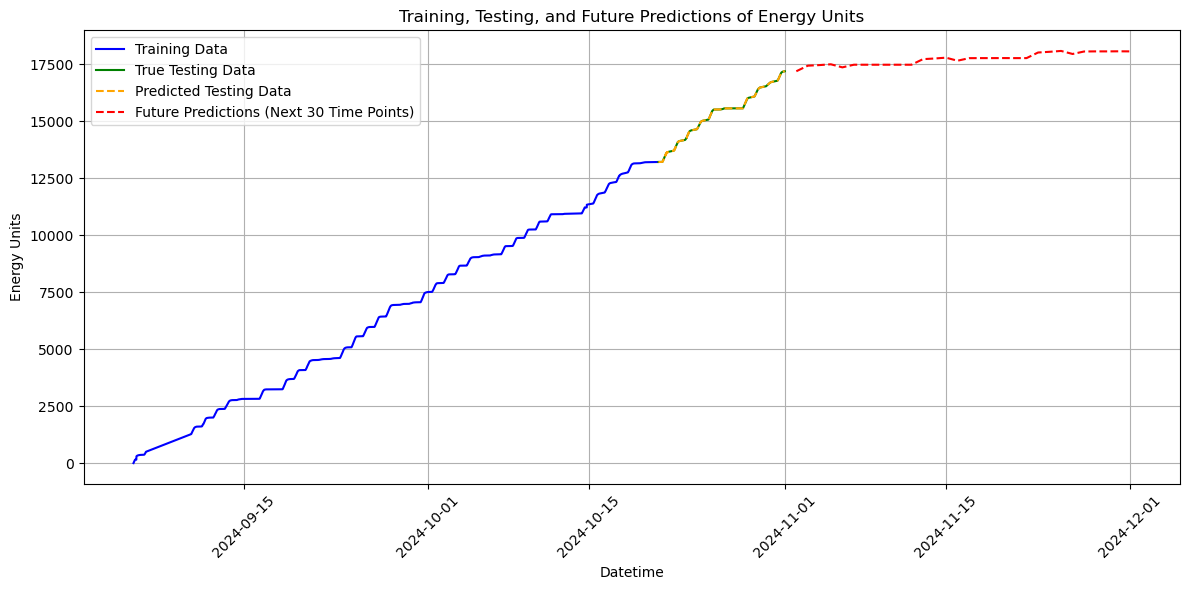

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('dataset_no_iqr_outliers.csv')

data = data[['datetime', 'energyUnits']]
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.sort_values('datetime')

data['dayofyear'] = data['datetime'].dt.dayofyear
data['dayofweek'] = data['datetime'].dt.dayofweek
data['weekofyear'] = data['datetime'].dt.isocalendar().week

data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month

lags = 10

for lag in range(1, lags + 1):
    data[f'energyUnits_lag_{lag}'] = data['energyUnits'].shift(lag)

data = data.dropna()

features = [
    'dayofyear', 'dayofweek', 'weekofyear', 'hour', 'month'
] + [f'energyUnits_lag_{lag}' for lag in range(1, lags + 1)]

X = data[features]
y = data['energyUnits']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score (Testing): {r2}")

feature_importance = pd.Series(model.coef_, index=features)
print("Feature Importance:\n", feature_importance)

plt.figure(figsize=(8, 4))
feature_importance.plot(kind='barh', color='teal')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Coefficients)")
plt.show()

last_data = X_test.iloc[-1, :].values.reshape(1, -1)
future_predictions = []

for _ in range(30): 
    future_pred = model.predict(last_data)[0]
    future_predictions.append(future_pred)
    
    last_data = np.roll(last_data, -1)
    last_data[0, -1] = future_pred

last_datetime = data['datetime'].iloc[-1]
future_times = pd.date_range(last_datetime, periods=31, freq='D')[1:]

future_predictions_df = pd.DataFrame(future_predictions, index=future_times, columns=['Predicted Energy Units'])

plt.figure(figsize=(12, 6))
plt.plot(data['datetime'][:len(y_train)], y_train, label='Training Data', color='blue')
plt.plot(data['datetime'][len(y_train):], y_test, label='True Testing Data', color='green')
plt.plot(data['datetime'][len(y_train):], y_pred, label='Predicted Testing Data', color='orange', linestyle='--')
plt.plot(future_predictions_df.index, future_predictions_df['Predicted Energy Units'], label='Future Predictions (Next 30 Time Points)', color='red', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Energy Units')
plt.title('Training, Testing, and Future Predictions of Energy Units')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Training MSE: 1.9829690040986478
Testing MSE: 0.18937872837556846
R^2 Score (Testing): 0.9999998031225515
Feature Importance:
 dayofyear            0.006524
dayofweek           -0.008060
weekofyear           0.002084
hour                 0.001505
month                0.014282
energyUnits_lag_1    0.999974
dtype: float64


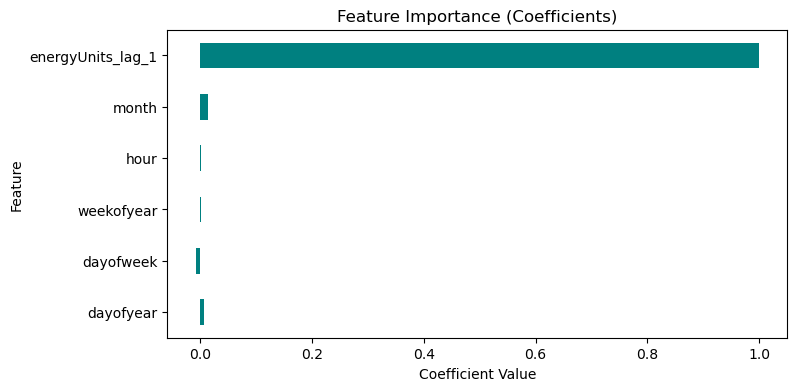

E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  w

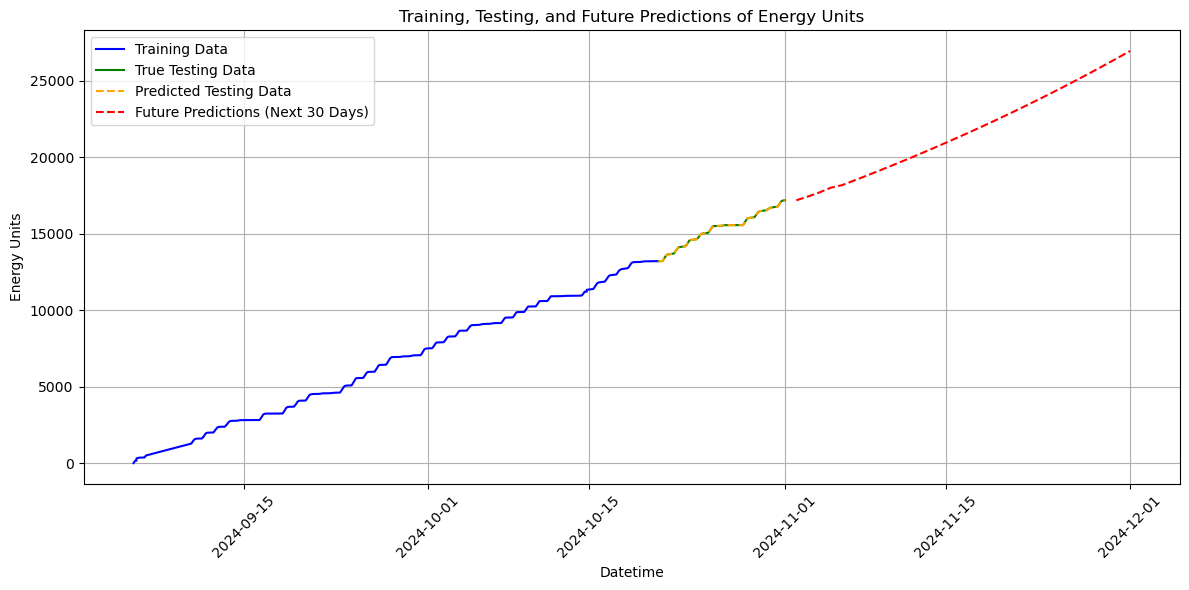

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('dataset_no_iqr_outliers.csv')

data = data[['datetime', 'energyUnits']]
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.sort_values('datetime')

data['dayofyear'] = data['datetime'].dt.dayofyear
data['dayofweek'] = data['datetime'].dt.dayofweek
data['weekofyear'] = data['datetime'].dt.isocalendar().week

data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month

data['energyUnits_lag_1'] = data['energyUnits'].shift(1)

data = data.dropna()

features = [
    'dayofyear', 'dayofweek', 'weekofyear', 'hour', 'month', 'energyUnits_lag_1'
]
X = data[features]
y = data['energyUnits']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score (Testing): {r2}")

feature_importance = pd.Series(model.coef_, index=features)
print("Feature Importance:\n", feature_importance)

plt.figure(figsize=(8, 4))
feature_importance.plot(kind='barh', color='teal')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Coefficients)")
plt.show()

last_data = X_test.iloc[-1, :].values.reshape(1, -1)
future_predictions = []

for _ in range(30): 
    future_pred = model.predict(last_data)[0]
    future_predictions.append(future_pred)
    last_data = np.roll(last_data, -1)
    last_data[0, -1] = future_pred

last_datetime = data['datetime'].iloc[-1]
future_times = pd.date_range(last_datetime, periods=31, freq='D')[1:]

future_predictions_df = pd.DataFrame(future_predictions, index=future_times, columns=['Predicted Energy Units'])

plt.figure(figsize=(12, 6))
plt.plot(data['datetime'][:len(y_train)], y_train, label='Training Data', color='blue')
plt.plot(data['datetime'][len(y_train):], y_test, label='True Testing Data', color='green')
plt.plot(data['datetime'][len(y_train):], y_pred, label='Predicted Testing Data', color='orange', linestyle='--')
plt.plot(future_predictions_df.index, future_predictions_df['Predicted Energy Units'], label='Future Predictions (Next 30 Days)', color='red', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Energy Units')
plt.title('Training, Testing, and Future Predictions of Energy Units')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
